In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier
warnings.filterwarnings('ignore')
from catboost import CatBoostRegressor, CatBoostClassifier

In [2]:
df_classification = pd.read_csv('D:/ML/data/classification/airlines_task_preprocessed.csv', index_col=0)
df_regression = pd.read_csv('D:/ML/data/regression/moldova_cars_task_preprocessed.csv', index_col=0)
y_cf = df_classification[["Delay"]]
X_cf = df_classification.drop(["Delay"], axis=1)
y_rs = df_regression[["Price(euro)"]]
X_rs = df_regression.drop(["Price(euro)"], axis=1)
y_cf_target = list(map(str, np.unique(y_cf.values).tolist()))
X_train_cf, X_test_cf, y_train_cf, y_test_cf = train_test_split(X_cf, y_cf, test_size=0.2, random_state=4)
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_rs, y_rs, test_size=0.2, random_state=4)

In [3]:
#Классификация дерево
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
search = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters, scoring="neg_mean_squared_error", ).fit(X_train_cf,y_train_cf)
print(search.best_params_)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 7}


|--- feature_1 <= 5.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_17 >  0.50
|   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- class: 0
|--- feature_1 >  5.50
|   |--- feature_19 <= 0.50
|   |   |--- class: 0
|   |--- feature_19 >  0.50
|   |   |--- class: 0

0.6309396089288805
[[16078  2008]
 [ 8656  2153]]
0.5174236962268686
0.1991858636321584
0.2876419505678023


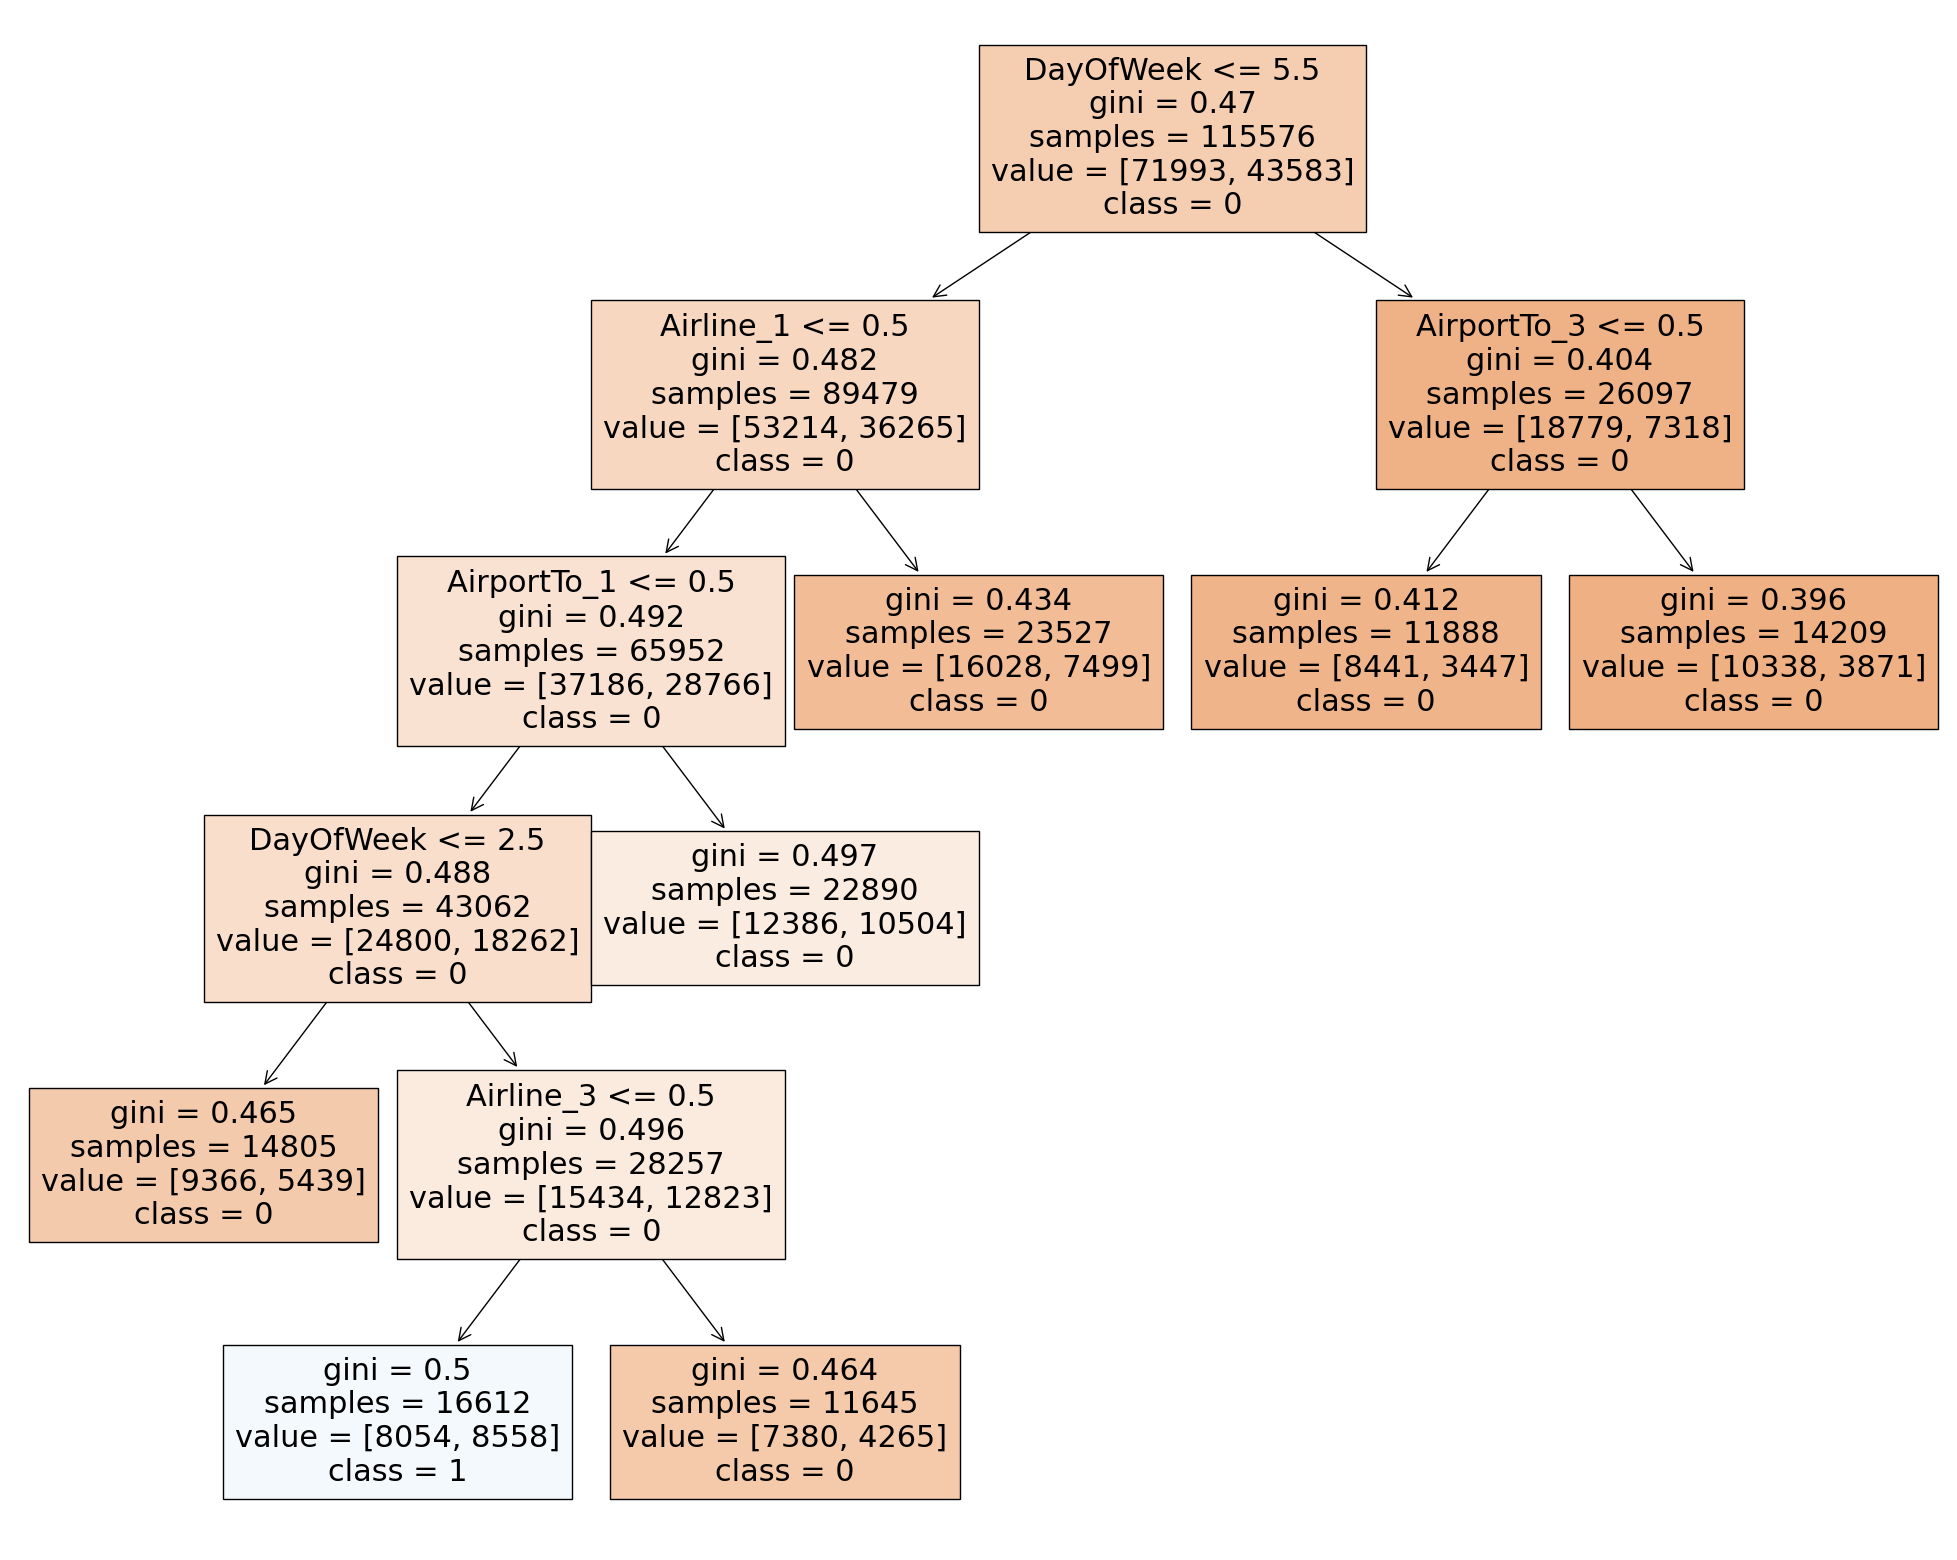

In [4]:
clf = DecisionTreeClassifier(splitter='best', max_depth=9, min_samples_leaf=3, min_weight_fraction_leaf=0.1, max_features='sqrt', max_leaf_nodes=60)
clf.fit(X_train_cf, y_train_cf)
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X_train_cf.columns.tolist(), class_names=y_cf_target, filled=True)
predictions = clf.predict(X_test_cf)
print(accuracy_score(y_test_cf, predictions))
print(confusion_matrix(y_test_cf, predictions))
print(precision_score(y_test_cf, predictions))
print(recall_score(y_test_cf, predictions))
print(f1_score(y_test_cf, predictions))

In [5]:
#Регрессия дерево
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
search = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=parameters, scoring="neg_mean_squared_error", )
optimalDecitionTreeReg = search.fit(X_train_rs,y_train_rs)
y_pred = optimalDecitionTreeReg.predict(X_test_rs)
print(search.best_params_)
print(f'MAE: {mean_absolute_error(y_test_rs, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_rs, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_rs, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_rs, y_pred))}')
print(f'R^2: {r2_score(y_test_rs, y_pred)}')

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 6, 'max_leaf_nodes': 40, 'max_features': 'auto', 'max_depth': 7}
MAE: 4037.2880384836617
MSE: 93112352.31598994
RMSE: 9649.474198939026
MAPE: 0.655846148973077
R^2: 0.33155270491196764


# Ансамбли

In [6]:
#Бэггинг классификация
bag = BaggingClassifier()
n_estimators = [5, 100]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, max_features = max_features, )
gridbag = RandomizedSearchCV(bag, hyperbag)
bestbag = gridbag.fit(X_train_cf, y_train_cf)
predictions = bestbag.predict(X_test_cf)
print(bestbag.best_params_)
print(accuracy_score(y_test_cf, predictions))
print(confusion_matrix(y_test_cf, predictions))
print(precision_score(y_test_cf, predictions))
print(recall_score(y_test_cf, predictions))
print(f1_score(y_test_cf, predictions))

{'n_estimators': 100, 'max_samples': 10, 'max_features': 5}
0.6254369268039454
[[18042    44]
 [10779    30]]
0.40540540540540543
0.002775464890369137
0.005513185702471746


In [7]:
#Бэггинг регрессия
bag = BaggingRegressor()
n_estimators = [5, 100]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, max_features = max_features)
gridbag = RandomizedSearchCV(bag, hyperbag)
bestbag = gridbag.fit(X_train_rs, y_train_rs)
y_pred = bestbag.predict(X_test_rs)
print(bestbag.best_params_)
print(f'MAE: {mean_absolute_error(y_test_rs, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_rs, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_rs, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_rs, y_pred))}')
print(f'R^2: {r2_score(y_test_rs, y_pred)}')

{'n_estimators': 100, 'max_samples': 10, 'max_features': 5}
MAE: 4692.989818757125
MSE: 106990901.46421473
RMSE: 10343.640629111915
MAPE: 1.1510286789521698
R^2: 0.231919536947377


In [18]:
#GradientBoostingClassifier
grad = GradientBoostingClassifier()
n_estimators = [20, 30]
max_depth = np.arange(1, 10, 2)
learning_rate = np.arange(0,1,0.1)
hyperGrad = dict(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
grid = RandomizedSearchCV(grad, hyperGrad)
bestmodel = grid.fit(X_train_cf, y_train_cf)
predictions = bestmodel.predict(X_test_cf)
print(bestmodel.best_params_)
print(accuracy_score(y_test_cf, predictions))
print(confusion_matrix(y_test_cf, predictions))
print(precision_score(y_test_cf, predictions))
print(recall_score(y_test_cf, predictions))
print(f1_score(y_test_cf, predictions))

{'n_estimators': 30, 'max_depth': 7, 'learning_rate': 0.2}
0.682471015746669
[[15894  2192]
 [ 6983  3826]]
0.6357593885011632
0.3539642890184106
0.45474534973554404


In [8]:
#GradientBoostingRegressor
grad = GradientBoostingRegressor()
n_estimators = [20, 30]
max_depth = np.arange(1, 7, 2)
learning_rate = np.arange(0,1,0.2)
hyperGrad = dict(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth)
grid = RandomizedSearchCV(grad, hyperGrad)
bestmodel = grid.fit(X_train_rs, y_train_rs)
y_pred = bestmodel.predict(X_test_rs)
print(bestmodel.best_params_)
print(f'MAE: {mean_absolute_error(y_test_rs, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_rs, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_rs, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_rs, y_pred))}')
print(f'R^2: {r2_score(y_test_rs, y_pred)}')

{'n_estimators': 20, 'max_depth': 1, 'learning_rate': 0.4}
MAE: 3683.383165411391
MSE: 79207246.07243454
RMSE: 8899.845283623448
MAPE: 0.6731328590361075
R^2: 0.4313765244721587


In [20]:
#StackingClassifier
estimators = [('knn', KNeighborsClassifier(n_neighbors=5)),('rfc', RandomForestClassifier())]
params = {'knn__n_neighbors': [3,5,9],'rfc__n_estimators': [20, 30],'rfc__max_depth': np.arange(1, 10, 2),'final_estimator__C': np.arange(1, 10, 2)} 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
grid = RandomizedSearchCV(estimator=clf, param_distributions=params, scoring='accuracy', )
bestmodel = grid.fit(X_train_cf, y_train_cf)
predictions = bestmodel.predict(X_test_cf)
print(bestmodel.best_params_)
print(accuracy_score(y_test_cf, predictions))
print(confusion_matrix(y_test_cf, predictions))
print(precision_score(y_test_cf, predictions))
print(recall_score(y_test_cf, predictions))
print(f1_score(y_test_cf, predictions))

{'rfc__n_estimators': 20, 'rfc__max_depth': 9, 'knn__n_neighbors': 5, 'final_estimator__C': 7}
0.6781103997231355
[[16127  1959]
 [ 7342  3467]]
0.6389605602653888
0.32075122583032656
0.4271019402525408


In [24]:
#StackingRegressor
estimators = [('lr', Ridge()),('svr', LinearSVR())]
parameters = {'lr__alpha': np.arange(0, 1, 0.1),'svr__C': np.arange(1, 9, 3),'final_estimator__max_depth': [1,5]}
stackinReg = StackingRegressor(
estimators=estimators,
final_estimator=RandomForestRegressor())
grid = RandomizedSearchCV(estimator=stackinReg, param_distributions=parameters )
bestmodel = grid.fit(X_train_rs, y_train_rs)
y_pred = bestmodel.predict(X_test_rs)
print(bestmodel.best_params_)
print(f'MAE: {mean_absolute_error(y_test_rs, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_rs, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_rs, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_rs, y_pred))}')
print(f'R^2: {r2_score(y_test_rs, y_pred)}')

{'svr__C': 7, 'lr__alpha': 0.1, 'final_estimator__max_depth': 5}
MAE: 3516.7681620557655
MSE: 238492244.4975447
RMSE: 15443.194115776201
MAPE: 0.6553789483882406
R^2: -0.7121197324372688


In [7]:
#Catboost
parameters={"depth" : [1,3], "learning_rate": np.arange(0, 1, 0.5,) }
search = RandomizedSearchCV(CatBoostClassifier(logging_level="Silent"),param_distributions=parameters )
optimalDecitionTreeClass = search.fit(X_train_cf,y_train_cf)
predictions = optimalDecitionTreeClass.predict(X_test_cf)
print(search.best_params_)
print(accuracy_score(y_test_cf, predictions))
print(confusion_matrix(y_test_cf, predictions))
print(precision_score(y_test_cf, predictions))
print(recall_score(y_test_cf, predictions))
print(f1_score(y_test_cf, predictions))

{'learning_rate': 0.5, 'depth': 3}
0.6770721578127704
[[15463  2623]
 [ 6708  4101]]
0.6099048185603807
0.379406050513461
0.46780357041008386


In [8]:
parameters={"depth" : [1,3],"learning_rate": np.arange(0, 1, 0.5,) }
search = RandomizedSearchCV(CatBoostRegressor(logging_level="Silent"),param_distributions=parameters )
optimalDecitionTreeReg = search.fit(X_train_rs,y_train_rs)
y_pred = optimalDecitionTreeReg.predict(X_test_rs)
print(search.best_params_)
print(f'MAE: {mean_absolute_error(y_test_rs, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_rs, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_rs, y_pred))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test_rs, y_pred))}')
print(f'R^2: {r2_score(y_test_rs, y_pred)}')

{'learning_rate': 0.5, 'depth': 1}
MAE: 4190.474391842671
MSE: 110090935.24213736
RMSE: 10492.42275368932
MAPE: 0.7663682749337297
R^2: 0.20966460361155514


In [45]:
#CART
from collections import Counter
from sklearn.datasets import make_regression, make_classification
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=3, n_features=None, isRegression = False):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
        self.isRegression = isRegression

    def fit(self, X, y):
        if self.isRegression:
            self.mode = "mse"
        else:
            self.mode = "entropy"
        self.n_features = X.shape[1]
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            if self.isRegression:
                leaf_value = np.mean(y)
            else:
                leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
    
        if self.mode == "entropy":
            parent_entropy = self._entropy(y)
            e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
            child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
            information_gain = parent_entropy - child_entropy
        else:
            information_gain = self.mean_squared_error(y) - ((n_l/n)*self.mean_squared_error(y[left_idxs]) + (n_r/n)*self.mean_squared_error(y[right_idxs]))
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    def mean_squared_error(self, y):
        mean = np.mean(y)
        mse = np.mean((y - mean)**2)
        return mse
        


X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTree()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))




X, y = make_regression(n_samples=1000, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = DecisionTree(isRegression = True)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, predictions))}')
print(f'MAPE: {(mean_absolute_percentage_error(y_test, predictions))}')
print(f'R^2: {r2_score(y_test, predictions)}')

0.95
[[ 9  1]
 [ 0 10]]
0.9090909090909091
1.0
0.9523809523809523
MAE: 8.453750886752566
MSE: 113.58495529157659
RMSE: 10.657624279902937
MAPE: 0.6853899365332665
R^2: 0.9339383206721783
